In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('C:/Users/me/Desktop/pyt/kaggle/drugs/drug200.csv')

## EXPLORING THE DATA

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We can see, there is no null value in the data.

## Counting unique Categorical values

In [5]:
data2= data.drop(['Age','Na_to_K'],axis=1)
for x in data2:
    print(pd.DataFrame(data[x].value_counts()))

   Sex
M  104
F   96
        BP
HIGH    77
LOW     64
NORMAL  59
        Cholesterol
HIGH            103
NORMAL           97
       Drug
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16


In [6]:
data.shape

(200, 6)

## Plotting Categorical values

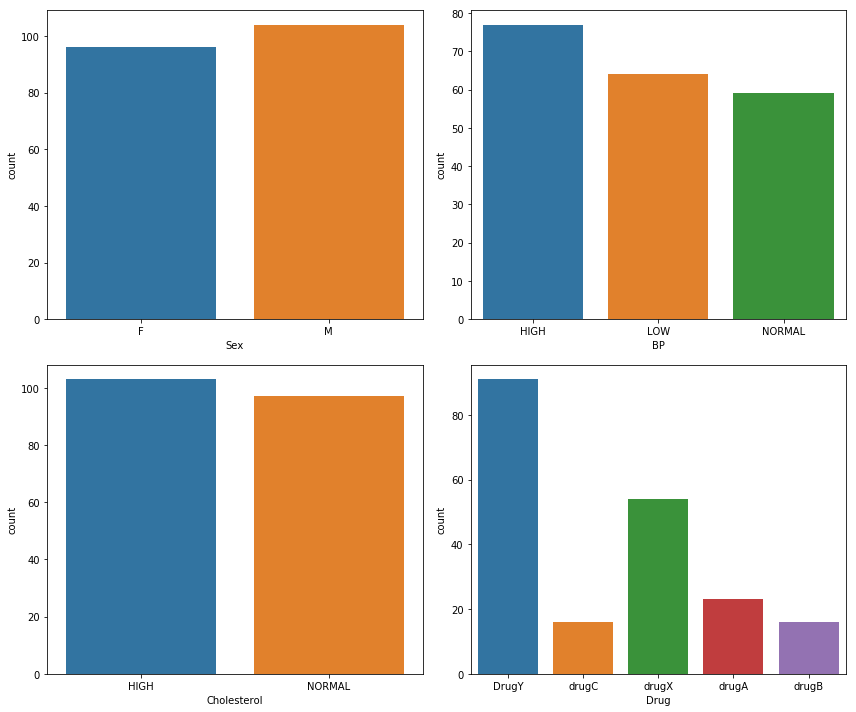

In [7]:
plt.figure(figsize=(12, 10))
n=1
for i in data2.columns:
    plt.subplot(2, 2, n)
    sns.countplot(data2[i])
    n=n+1
plt.tight_layout()
plt.show()

##                                                                 or

Text(0.5,1,'BP')

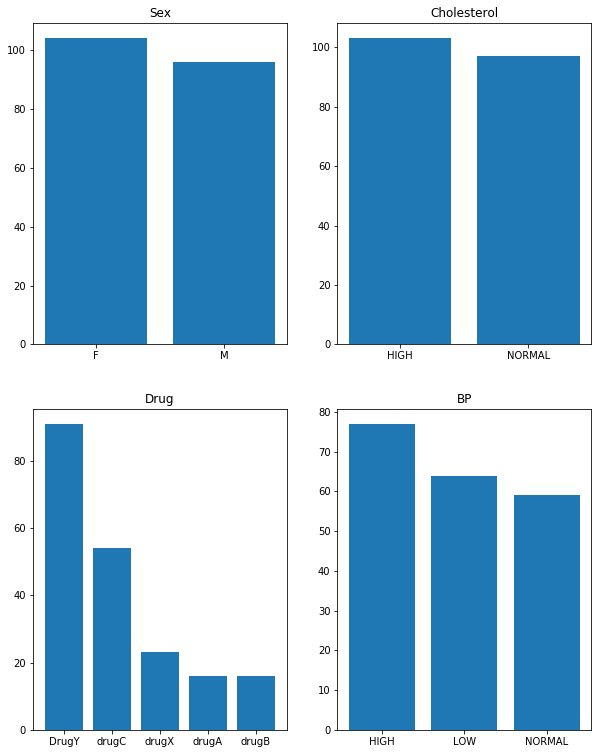

In [8]:
fig, ax= plt.subplots(2, 2, figsize=(10,13))
ax[0,0].bar(data2['Sex'].unique(), data2['Sex'].value_counts())
ax[0,0].set_title('Sex')
ax[0,1].bar(data2['Cholesterol'].unique(), data2['Cholesterol'].value_counts())
ax[0,1].set_title('Cholesterol')
ax[1,0].bar(data2['Drug'].unique(), data2['Drug'].value_counts())
ax[1,0].set_title('Drug')
ax[1,1].bar(data2['BP'].unique(), data2['BP'].value_counts())
ax[1,1].set_title('BP')     

## Encoding the data

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in data2.columns:
    data2[i] = le.fit_transform(data2[i])
    print(i, le.classes_)

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [10]:
data2['Age']= pd.Series(data['Age'])
data2['Na_to_K']= pd.Series(data['Na_to_K'])
for col in data2.columns:
    data2[col]= data2[col].astype('int64')
x= data2.drop('Drug', axis=1)
y= data2['Drug']

In [11]:
data2.head()

,Sex,BP,Cholesterol,Drug,Age,Na_to_K
0,0,0,0,0,23,25
1,1,1,0,3,47,13
2,1,1,0,3,47,10
3,0,2,0,4,28,7
4,0,1,0,0,61,18


## Finding the correlation

In [12]:
round(data2.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Sex,200.0,0.520,0.501,0.0,0.0,1.0,1.0,1.0
BP,200.0,0.910,0.822,0.0,0.0,1.0,2.0,2.0
Cholesterol,200.0,0.485,0.501,0.0,0.0,0.0,1.0,1.0
Drug,200.0,1.595,1.716,0.0,0.0,1.0,4.0,4.0
Age,200.0,44.315,16.544,15.0,31.0,45.0,58.0,74.0
Na_to_K,200.0,15.585,7.199,6.0,10.0,13.0,19.0,38.0


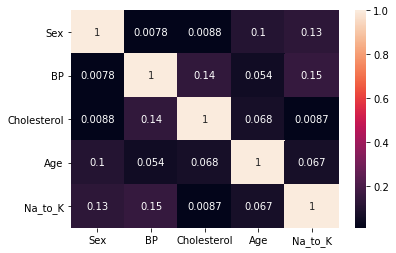

In [13]:
sns.heatmap(x.corr().abs() , annot= True)

We are not going to remove any column.

In [14]:
data.shape

(200, 6)

In [15]:
women= data2[data2['Sex']==0]
men= data2[data2['Sex']==1]

AttributeError: 'AxesSubplot' object has no attribute 'delete'

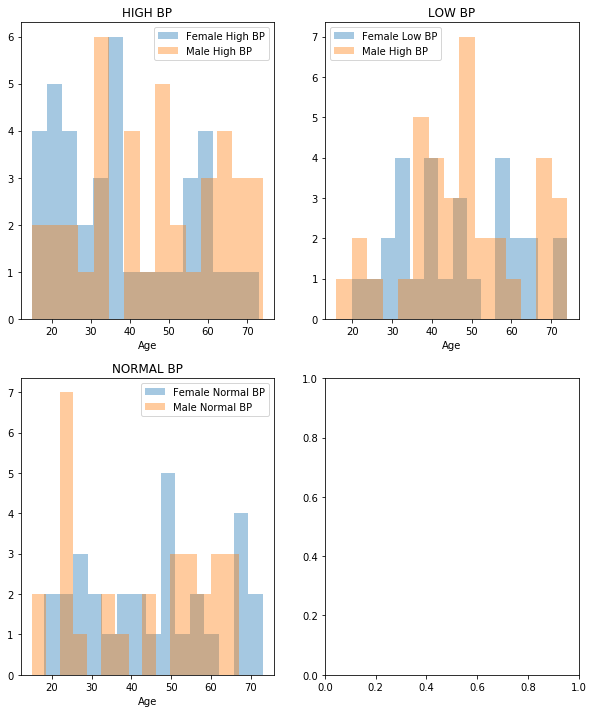

In [16]:
high_f= women[women['BP']==0].Age.dropna()
low_f= women[women['BP']==1].Age.dropna()
normal_f= women[women['BP']==2].Age.dropna()

high_m= men[men['BP']==0].Age.dropna()
low_m= men[men['BP']==1].Age.dropna()
normal_m= men[men['BP']==2].Age.dropna()

fig, ax= plt.subplots(2,2, figsize=(10,12))
sns.distplot(high_f, label="Female High BP", ax=ax[0,0], bins=15, kde=False)
sns.distplot(high_m, label="Male High BP", ax=ax[0,0], bins=15, kde=False)
ax[0,0].legend()
ax[0,0].set_title('HIGH BP')

sns.distplot(low_f, label="Female Low BP", ax=ax[0,1], bins=15, kde=False)
sns.distplot(low_m, label="Male High BP", ax=ax[0,1], bins=15, kde=False)
ax[0,1].legend()
ax[0,1].set_title('LOW BP')

sns.distplot(normal_f, label="Female Normal BP", ax=ax[1,0], bins=15, kde=False)
sns.distplot(normal_m, label="Male Normal BP", ax=ax[1,0], bins=15, kde= False)
ax[1,0].legend()
ax[1,0].set_title('NORMAL BP')
ax[1,1].delete

Here, we can see:
 
 i) WOMEN in the Age group of 15-35 years tend to have HIGHER BP than MEN. But, after 37 years MEN tend to have higher BP.
 
 ii) MEN in the Age group of 37-56 years tend to have LOWER BP than WOMEN.
 
 iii) MEN with NORMAL BP occurs after 50 years of age, but, we can see WOMEN have comparatively larger number than MEN
     throughout the ages.


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,KFold

## Making function for prediction

In [ ]:
def result_using_non_tree_classifier(x_train,x_test,y_train,y_test):
    kf = KFold(n_splits=5, random_state=None)
    scores= []
    algos1={'KNN' : {'model' : KNeighborsClassifier(n_jobs= -1) , 
                    'param' : {'n_neighbors' : np.arange(1,20,3).tolist() , 'weights' : ['distance' , 'uniform']}
                    },
            
            'SGD' : {'model' : SGDClassifier(),
                    'param' : {'penalty' : ['l2', 'l1', 'elasticnet'], 'loss' : ['hinge','log','modified_huber','perceptron']}
                    },
            
            'GaussianNB' : {'model': GaussianNB(),
                            'param':{}
                           }
           }
    for algo_name, params in algos1.items() :
        Grid1 = GridSearchCV(params['model'], params['param'], cv=kf, return_train_score=False)
        Grid1.fit(x_train, y_train)
        ypred= Grid1.predict(x_test)
        scores.append({
            'model' : algo_name,
            'best_score': Grid1.best_score_ ,
            'best_params' : Grid1.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result_using_non_tree_classifier(x_train,x_test,y_train,y_test)

From the above Data Frame, we can conclude that 'GaussianNB' comes out to be the better option of all the other classifiers.

## Trying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
result= []
RF = RandomForestClassifier(oob_score=False, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators= n_trees)     # Use this to set the number of trees
    RF.fit(x_train,y_train)
    ypred= RF.predict(x_test)
    result.append(pd.Series({
        'num_trees' : n_trees,
        'accuracy' : accuracy_score(ypred, y_test)
    }))
results= pd.concat(result, axis=1).T.set_index('num_trees')
results

Surprisingly, RANDOM FOREST predicts with 100% accuracy!

## If there is any kind of mistake do let me know in the comments. Please!